# ME 6210 Lab Notes

Lab 1
===

Identification of Damping Using Log Decrement
----------------------------------------------------


In [126]:
%load_ext autoreload
%autoreload 2
import vibration_toolbox as vtb
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import math as math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Geometry and Material Properties
-------------------------------------

In [127]:
E=7.31e10 #young's Modulus
b1=0.0254 #width
h=0.0127 #height
l=0.5524 #length
r=2.7*(10**3) #Density
v=l*b1*h #volume
m=r*v #mass
I=(1/12)*b1*(h**3) #Area moment of inertia
n=400#no: of amplitudes to be considered in the experimental plots for analysis

Plotting Experimental Data
------------------------------

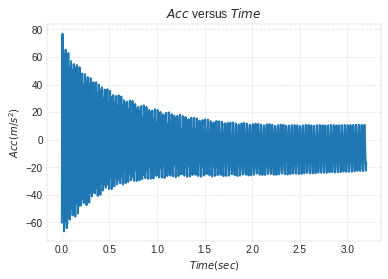

In [128]:
# Acc vs Time

%matplotlib inline
mat_contents=sio.loadmat('Case1-2.mat')
Time = mat_contents['Time_domain']
b = mat_contents['Time_chan_2']
# The acceleration values from Bobcat will be in Gs. So,  to convert them to m/s^2,
# we will have to multiply the vector by 9.81
Acc=b*9.81 
plt.plot(Time,Acc)
plt.grid('on')
plt.ylabel('$Acc(m/s^2)$')
plt.xlabel('$Time(sec)$')
plt.title('$Acc$ versus $Time$')
plt.show()

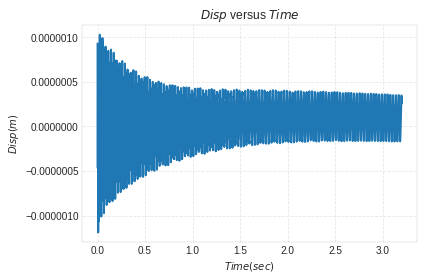

In [129]:
#  Disp vs Time

Td= (Time[n]-Time[0])/n
Wd=(2*math.pi)/Td
Disp=Acc/(-Wd**2)
plt.plot(Time,Disp)
plt.grid('on')
plt.ylabel('$Disp(m)$')
plt.xlabel('$Time(sec)$')
plt.title('$Disp$ versus $Time$')
plt.show()

    

Experimental Data Analysis
------------------------------

In [154]:
delta=(1/n)*(math.log(Disp[0]/Disp[n-1]))
delta

0.002263254380081169

In [155]:
Td= (Time[n]-Time[0])/n
Td

array([ 0.00078125], dtype=float32)

In [156]:
Wd=(2*math.pi)/Td
Wd

array([ 8042.48486328], dtype=float32)

In [157]:
zeta=(delta)/(math.sqrt((4*(math.pi)**2)+(delta)**2))
zeta

0.0003602080986958213

In [158]:
Wn=(Wd)/(math.sqrt(1-(zeta)**2))
#wn=Wn/(2*math.pi)
Wn

array([ 8042.48535156], dtype=float32)

In [159]:
ccr=2*m*Wn
c=ccr*zeta
c

array([ 2.78758812], dtype=float32)

Analytical 
------------

In [ ]:
k=(3*E*I)/(l**3) #stiffness
k

In [117]:
m=r*v #mass
m

0.48112161839999995

In [118]:
wn=math.sqrt(k/m)
wn

108.27873962003879

In [119]:
ccr=2*math.sqrt(k*m)
c=ccr*zeta
c

0.24698817784097568

Estimated Disp vs Time using Vibration Toolbox
-----------------------------------------------------

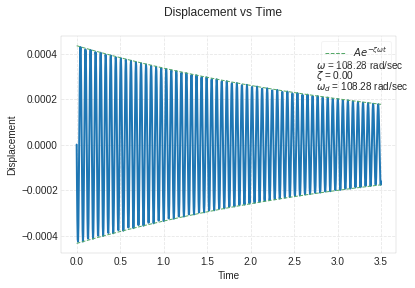

In [160]:
vtb.time_plot(m=r*v, c=0.2469, k=(3*E*I)/(l**3), x0=0, v0=Time[1]*Acc[0], max_time=3.5)

Mode Shapes for Cantilever Beam: (from table 6.6 in the text)
----------------------------------------------------------------------   

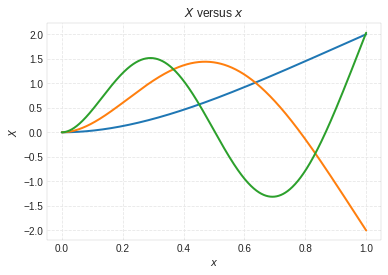

In [143]:
# first three mode shapes
%matplotlib inline
beta = np.array([1.87510407, 4.69409113, 7.85475744])
alpha = np.array([0.7341, 1.0185, 0.9992])
x = np.linspace(0, 1, num=1000)
for i in range(0, 3):
    X=np.cosh(beta[i]*x)-np.cos(beta[i]*x)-alpha[i]*(np.sinh(beta[i]*x)-np.sin(beta[i]*x))
    plt.plot(x, X)
    plt.grid('on')
    plt.ylabel('$X$')
    plt.xlabel('$x$')
    plt.title('$X$ versus $x$')
#plt.show()